In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_data=pd.read_csv("hotel_bookings.csv",sep=',')

In [3]:
hotel_data.shape

(119390, 32)

In [4]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Possible questions to answer (from Kaggle)
#### When is the best time of year to book a hotel room?
#### What is the optimal length of stay in order to get the best daily rate?
#### What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

## Column headers and what everything actually stands for

hotel - H1 = Resort Hotel; H2 = City Hotel

is_canceled - Value indicating if the booking was canceled (1) or not (0)

lead_time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year - Year of arrival date

arrival_date_month - Month of arrival date

arrival_date_week_number - Week number of year for arrival date

arrival_date_day_of_month - Day of arrival date

stays_in_weekend_nights - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults - Number of adults

children - Number of children

babies - Number of babies

meal - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal 
package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

country - Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest - Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations - Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled - Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
agentID of the travel agency that made the booking
companyID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer
customer_type
Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

adr - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces - Number of car parking spaces required by the customer
total_of_special_requests - Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status - Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [5]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
hotel_data.reservation_status_date=pd.to_datetime(hotel_data.reservation_status_date)

In [7]:
hotel_data.hotel=pd.Categorical(hotel_data.hotel)

In [8]:
hotel_data.dtypes

hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

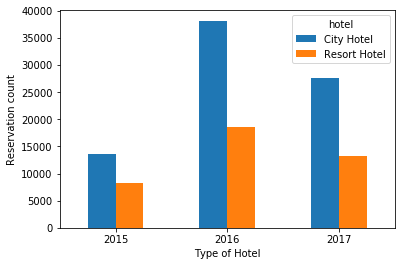

In [9]:
hotel_data.groupby('hotel').arrival_date_year.value_counts().unstack(0).plot.bar()
plt.ylabel("Reservation count")
plt.xlabel("Type of Hotel")
plt.xticks(rotation=0)
plt.show()

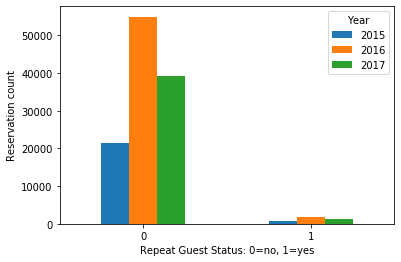

In [10]:
hotel_data.groupby('arrival_date_year').is_repeated_guest.value_counts().unstack(0).plot.bar()
plt.ylabel("Reservation count")
plt.xlabel("Repeat Guest Status: 0=no, 1=yes")
plt.legend(title="Year")
plt.xticks(rotation=0)
plt.show()

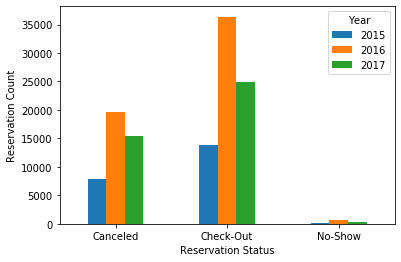

In [11]:
hotel_data.groupby('arrival_date_year').reservation_status.value_counts().unstack(0).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Reservation Status")
plt.ylabel("Reservation Count")
plt.legend(title="Year")

plt.show()

# Since 2016 is the only year with data for the entire year, we will first look at only the data for 2016.

In [12]:
hotel_2016=hotel_data[hotel_data.arrival_date_year==2016]

In [13]:
hotel_2016

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3738,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02
3739,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02
3740,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient,89.00,0,1,No-Show,2016-01-01
3741,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,No Deposit,241.0,NaN,0,Transient,73.46,0,2,Check-Out,2016-01-03
3742,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,119.00,0,0,Canceled,2015-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104142,City Hotel,0,17,2016,December,53,30,2,5,2,...,No Deposit,9.0,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06
104145,City Hotel,0,177,2016,December,53,30,2,5,0,...,No Deposit,NaN,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06
104147,City Hotel,0,107,2016,December,53,31,2,5,2,...,No Deposit,28.0,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07
104216,City Hotel,0,310,2016,December,53,27,2,10,2,...,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08


In [71]:
hotel_2016.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             272
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7577
company                           53525


In [26]:
hotel_2016["arrival_date_month"].value_counts()

October      6203
May          5478
April        5428
September    5394
June         5292
August       5063
March        4824
July         4572
November     4454
February     3891
December     3860
January      2248
Name: arrival_date_month, dtype: int64

## Unfortunately, the months are not sorted properly - the goal is to get them in chronological order.

In [15]:
# converting the arrival month column to a categorical variable
months_category=pd.Categorical(hotel_2016.arrival_date_month)

In [16]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [17]:
# creating the ordered categories for the months
months_cat = pd.Categorical(hotel_2016['arrival_date_month'], categories=months, ordered=True)

In [18]:
hotel_2016.loc[:,'arrival_date_month']=months_cat

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### We now check to make sure that value_counts returns the proper order.

In [95]:
hotel_2016["arrival_date_month"].value_counts(sort=False)[3]

5428

### Let's take a closer look at what monthly_res actually is.

In [51]:
monthly_res = hotel_2016["arrival_date_month"].value_counts()
print(monthly_res,'\n')
print(monthly_res.index,'\n')
print(monthly_res.values)

October      6203
May          5478
April        5428
September    5394
June         5292
August       5063
March        4824
July         4572
November     4454
February     3891
December     3860
January      2248
Name: arrival_date_month, dtype: int64 

CategoricalIndex(['October', 'May', 'April', 'September', 'June', 'August',
                  'March', 'July', 'November', 'February', 'December',
                  'January'],
                 categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', ...], ordered=True, dtype='category') 

[6203 5478 5428 5394 5292 5063 4824 4572 4454 3891 3860 2248]


### And now we get to make a pretty barplot with the months as our index (x).

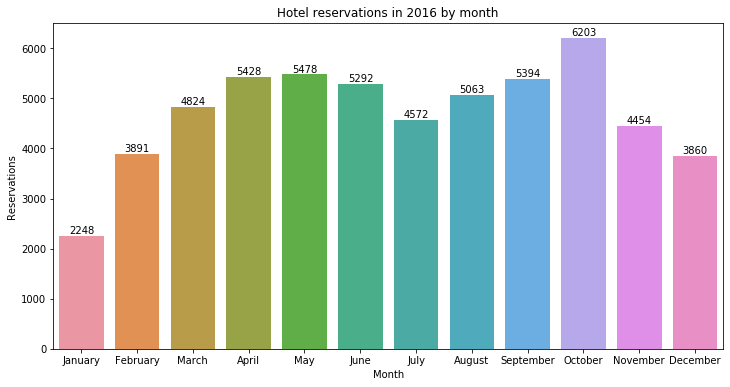

In [103]:
plt.figure(figsize=(12,6))
sns.barplot(monthly_res.index, monthly_res.values)
plt.xlabel("Month")
plt.ylabel("Reservations")
plt.title("Hotel reservations in 2016 by month")
for i in range(len(monthly_res)):
    plt.text(x=i-.22,
             y=hotel_2016["arrival_date_month"].value_counts(sort=False)[i]+50,
             s=hotel_2016["arrival_date_month"].value_counts(sort=False)[i],
             size = 10)
plt.show()

### There is a small rise throughout the first half of the year and a spike in October - were prices lower around this time of year?

In [22]:
print("Average of daily rates by month")
print(hotel_2016.groupby("arrival_date_month").adr.mean())
print("Standard deviation of daily rates by month")
print(hotel_2016.groupby("arrival_date_month").adr.std())

Average of daily rates by month
arrival_date_month
January       64.767656
February      70.102269
March         79.069326
April         88.918920
May           96.399286
June         106.977315
July         125.484536
August       142.893595
September    114.749566
October       95.111794
November      80.737580
December      86.370246
Name: adr, dtype: float64
Standard deviation of daily rates by month
arrival_date_month
January      26.014542
February     26.657980
March        83.734698
April        32.096994
May          37.798933
June         33.763532
July         48.952840
August       57.523211
September    40.650498
October      37.663455
November     35.299270
December     44.983220
Name: adr, dtype: float64


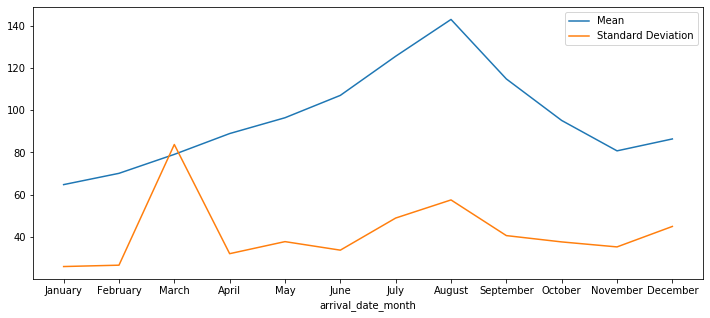

In [63]:
plt.figure(figsize=(12,5))
hotel_2016.groupby("arrival_date_month").adr.mean().plot()
hotel_2016.groupby("arrival_date_month").adr.std().plot()
plt.legend(["Mean","Standard Deviation"])
plt.xticks(range(0,len(monthly_res)), months)
plt.show()

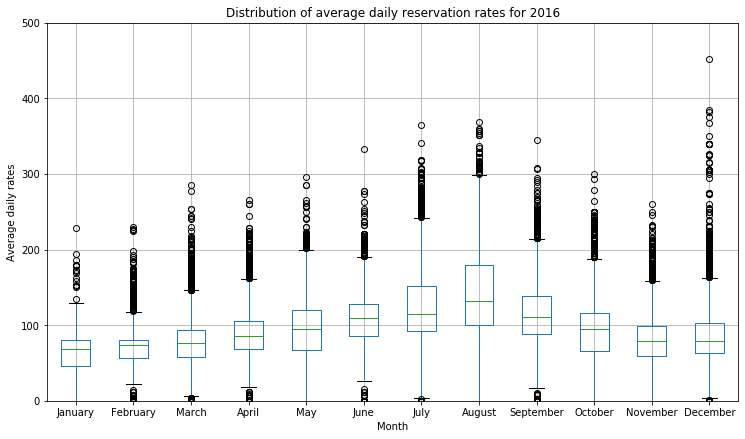

In [25]:
fig, ax = plt.subplots(figsize=(12,7))
hotel_2016.boxplot(column="adr", by="arrival_date_month", ax=ax)
plt.ylim(0,500)
plt.xlabel("Month")
plt.ylabel("Average daily rates")
plt.suptitle('')
plt.title("Distribution of average daily reservation rates for 2016")
plt.show()

### There are notable spikes in August and December, along with dips and smaller outliers in January, October, and November.